In [2]:
#libraries
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
from scipy.stats import skew
from sklearn import svm, neighbors

In [3]:
#import Min Max Temperature (already formatted in Excel)

MinMax = pd.read_csv('Min Max Temp 2.csv')
MinMax

,Product code,Bureau of Meteorology station number,Year,Month,Day,Day of the Year,Day of the Week,Minimum temperature (Degree C),Maximum temperature (Degree C)
0,IDCJAC0010,86338,2015,1,1,1,Thursday,13.3,26.9
1,IDCJAC0010,86338,2015,1,2,2,Friday,15.4,38.8
2,IDCJAC0010,86338,2015,1,3,3,Saturday,20.0,38.2
3,IDCJAC0010,86338,2015,1,4,4,Sunday,16.3,21.4
4,IDCJAC0010,86338,2015,1,5,5,Monday,15.0,22.0
...,...,...,...,...,...,...,...,...,...
2246,IDCJAC0010,86338,2021,2,24,55,Wednesday,13.0,20.2
2247,IDCJAC0010,86338,2021,2,25,56,Thursday,11.3,24.3
2248,IDCJAC0010,86338,2021,2,26,57,Friday,13.3,19.7
2249,IDCJAC0010,86338,2021,2,27,58,Saturday,11.3,18.6


In [4]:
MinMax.shape

(2251, 9)

In [5]:
MinMax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2251 entries, 0 to 2250
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Product code                          2251 non-null   object 
 1   Bureau of Meteorology station number  2251 non-null   int64  
 2   Year                                  2251 non-null   int64  
 3   Month                                 2251 non-null   int64  
 4   Day                                   2251 non-null   int64  
 5   Day of the Year                       2251 non-null   int64  
 6   Day of the Week                       2251 non-null   object 
 7   Minimum temperature (Degree C)        2251 non-null   float64
 8   Maximum temperature (Degree C)        2251 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 158.4+ KB


In [6]:
#Check for missing values

MinMax.isnull().sum()

Product code                            0
Bureau of Meteorology station number    0
Year                                    0
Month                                   0
Day                                     0
Day of the Year                         0
Day of the Week                         0
Minimum temperature (Degree C)          0
Maximum temperature (Degree C)          0
dtype: int64

In [7]:
#Delete columns that are irrelevant for prediction

MinMax = MinMax.drop(columns = ["Product code", "Bureau of Meteorology station number"])
MinMax.shape

(2251, 7)

In [8]:
#Rename min and max columns for easier coding

MinMax = MinMax.rename(columns = {'Minimum temperature (Degree C)': 'Min'})
MinMax = MinMax.rename(columns = {'Maximum temperature (Degree C)': 'Max'})
MinMax


,Year,Month,Day,Day of the Year,Day of the Week,Min,Max
0,2015,1,1,1,Thursday,13.3,26.9
1,2015,1,2,2,Friday,15.4,38.8
2,2015,1,3,3,Saturday,20.0,38.2
3,2015,1,4,4,Sunday,16.3,21.4
4,2015,1,5,5,Monday,15.0,22.0
...,...,...,...,...,...,...,...
2246,2021,2,24,55,Wednesday,13.0,20.2
2247,2021,2,25,56,Thursday,11.3,24.3
2248,2021,2,26,57,Friday,13.3,19.7
2249,2021,2,27,58,Saturday,11.3,18.6


In [9]:
#Test for predictive values of columns
from scipy import stats
a = MinMax['Day']
b = MinMax['Min']
c = MinMax['Max']
print("r value (Min) is:", stats.pearsonr(a,b)[0])
print("r value (Max) is:", stats.pearsonr(a,c)[0])

r value (Min) is: -0.007087330962648388
r value (Max) is: -0.007638031646994907


In [10]:
#Test for predictive values of columns
a = MinMax['Day of the Year']
b = MinMax['Min']
c = MinMax['Max']
print("r value (Min) is:", stats.pearsonr(a,b)[0])
print("r value (Max) is:", stats.pearsonr(a,c)[0])

r value (Min) is: -0.2845187797623929
r value (Max) is: -0.19244703260394083


In [11]:
#Test for predictive values of columns
a = MinMax['Year']
b = MinMax['Min']
c = MinMax['Max']
print("r value (Min) is:", stats.pearsonr(a,b)[0])
print("r value (Max) is:", stats.pearsonr(a,c)[0])

r value (Min) is: 0.01717894173223949
r value (Max) is: 0.025392806702835113


In [12]:
a = MinMax['Month']
b = MinMax['Min']
c = MinMax['Max']
print("r value (Min) is:", stats.pearsonr(a,b)[0])
print("r value (Max) is:", stats.pearsonr(a,c)[0])

r value (Min) is: -0.28719492028346094
r value (Max) is: -0.19449048925108192


#### Day of the Month < r = |0.01| and Year < r = |0.04| consider removing for better prediction. 

In [13]:
MinMax['Day'] = MinMax['Day'].astype(str)
MinMax.dtypes

Year                 int64
Month                int64
Day                 object
Day of the Year      int64
Day of the Week     object
Min                float64
Max                float64
dtype: object

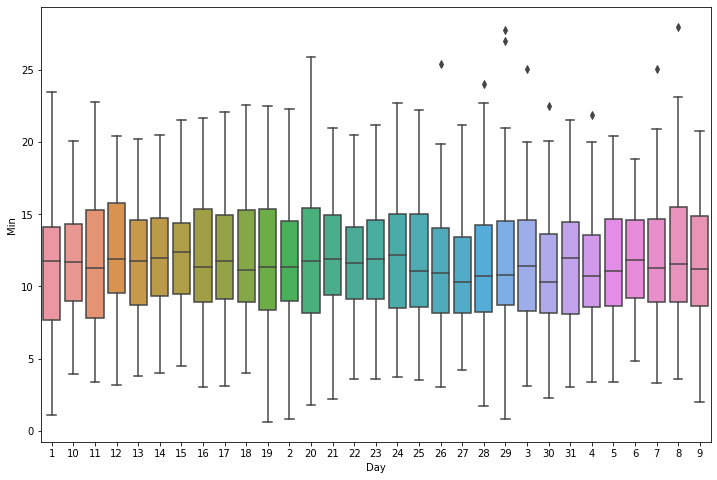

In [14]:
#Box plots of Day of Month for Minimum temperature
from matplotlib import figure

plt.figure(figsize=(12,8))
sns.boxplot(x= 'Day', y= 'Min',data = MinMax)
plt.show()


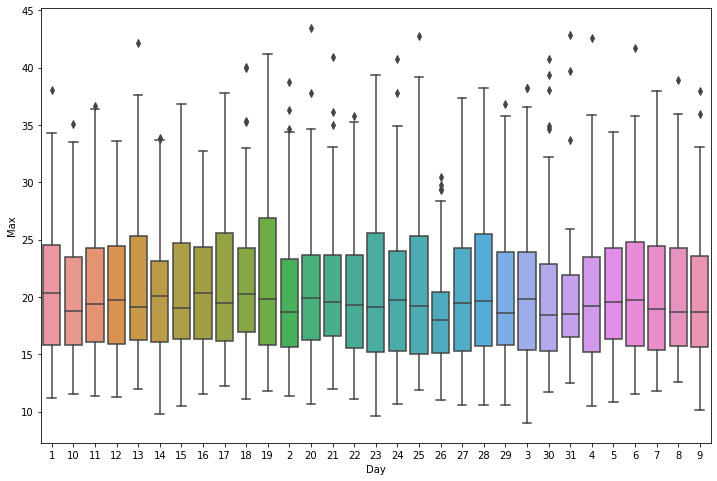

In [15]:
#Box plots of Day of Month for Maximum temperature

plt.figure(figsize=(12,8))
sns.boxplot(x= 'Day', y= 'Max',data = MinMax)
plt.show()

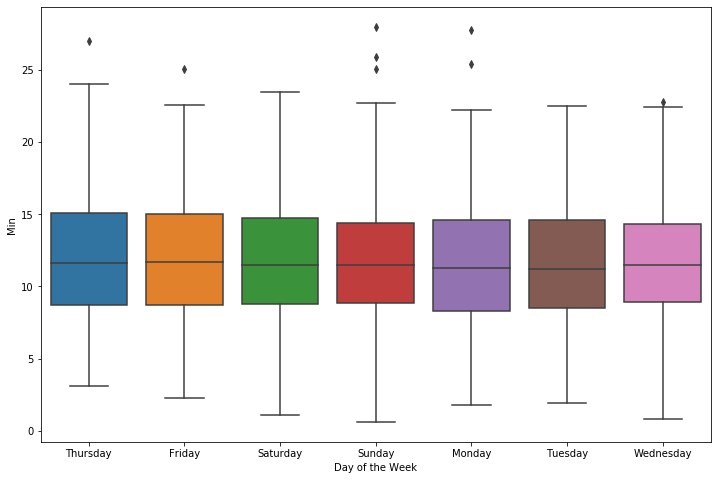

In [16]:
#Box plots of Day of the Week for Minimum temperature

plt.figure(figsize=(12,8))
sns.boxplot(x= 'Day of the Week', y= 'Min',data = MinMax)
plt.show()

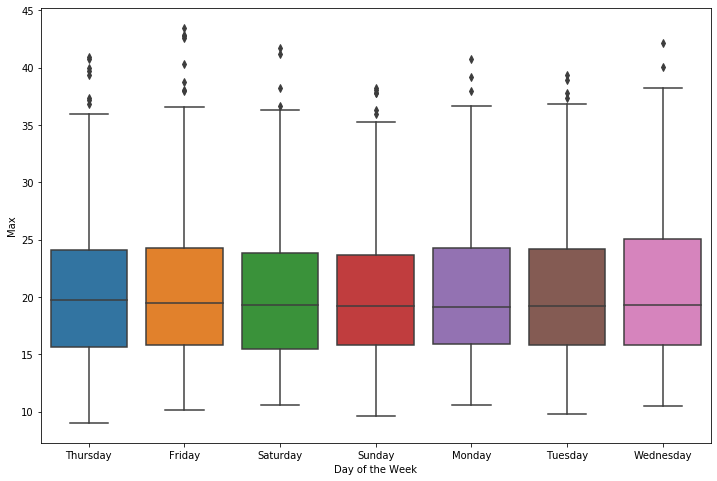

In [17]:
#Box plots of Day of the Week for Maximum temperature

plt.figure(figsize=(12,8))
sns.boxplot(x= 'Day of the Week', y= 'Max',data = MinMax)
plt.show()

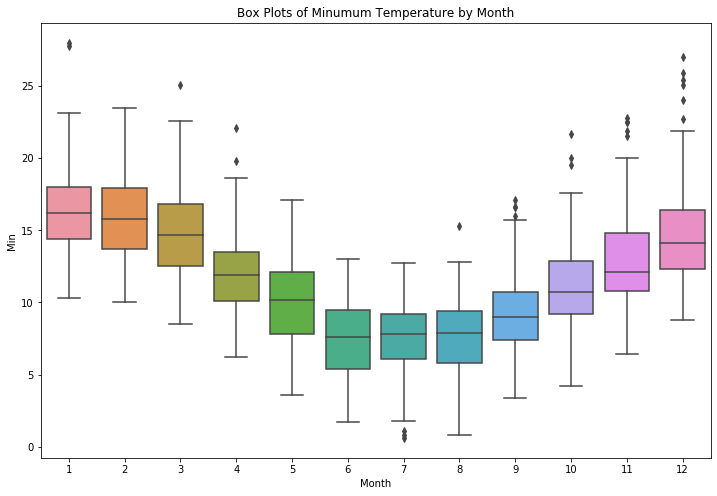

In [18]:
#Box plots of Month for Minumum temperature

plt.figure(figsize=(12,8))
sns.boxplot(x= 'Month', y= 'Min',data = MinMax)
plt.title('Box Plots of Minumum Temperature by Month')
plt.show()


In [19]:
MinTEMP = MinMax.groupby("Month")["Min"].describe()
MinTEMP["lowerwhisker"] = MinTEMP["25%"]-1.5*(MinTEMP["75%"]-MinTEMP["25%"])
MinTEMP["upperwhisker"] = MinTEMP["75%"]+1.5*(MinTEMP["75%"]-MinTEMP["25%"])
MinTEMP

,count,mean,std,min,25%,50%,75%,max,lowerwhisker,upperwhisker
Month,,,,,,,,,,
1,217.0,16.328111,2.814676,10.3,14.400,16.20,18.000,28.0,9.0000,23.4000
2,198.0,15.893434,2.647594,10.0,13.700,15.80,17.900,23.5,7.4000,24.2000
3,186.0,14.852151,3.142459,8.5,12.500,14.65,16.850,25.1,5.9750,23.3750
4,180.0,11.968333,2.718188,6.2,10.100,11.90,13.525,22.1,4.9625,18.6625
5,186.0,10.048387,2.742049,3.6,7.825,10.20,12.100,17.1,1.4125,18.5125
6,180.0,7.448333,2.590474,1.7,5.375,7.60,9.500,13.0,-0.8125,15.6875
7,186.0,7.465054,2.378988,0.6,6.100,7.80,9.175,12.7,1.4875,13.7875
8,186.0,7.653226,2.383210,0.8,5.800,7.85,9.375,15.3,0.4375,14.7375
9,180.0,9.185556,2.754846,3.4,7.400,9.00,10.725,17.1,2.4125,15.7125


In [20]:
Test = MinMax.groupby(["Month", "Min"])
Test.head(10)

,Year,Month,Day,Day of the Year,Day of the Week,Min,Max
0,2015,1,1,1,Thursday,13.3,26.9
1,2015,1,2,2,Friday,15.4,38.8
2,2015,1,3,3,Saturday,20.0,38.2
3,2015,1,4,4,Sunday,16.3,21.4
4,2015,1,5,5,Monday,15.0,22.0
...,...,...,...,...,...,...,...
2246,2021,2,24,55,Wednesday,13.0,20.2
2247,2021,2,25,56,Thursday,11.3,24.3
2248,2021,2,26,57,Friday,13.3,19.7
2249,2021,2,27,58,Saturday,11.3,18.6


In [21]:
Test.to_csv('Test.csv')

AttributeError: 'DataFrameGroupBy' object has no attribute 'to_csv'

In [ ]:
MinTEMP.to_csv('MinTemp.csv')

In [ ]:
MaxTEMP = MinMax.groupby("Month")["Max"].describe()
MaxTEMP["lowerwhisker"] = MaxTEMP["25%"]-1.5*(MaxTEMP["75%"]-MaxTEMP["25%"])
MaxTEMP["upperwhisker"] = MaxTEMP["75%"]+1.5*(MaxTEMP["75%"]-MaxTEMP["25%"])
MaxTEMP

In [ ]:
MaxTEMP = MaxTEMP.drop(columns = ['count', 'mean', 'std'])
MaxTEMP

In [ ]:
MaxTEMP.to_csv('MaxTemp.csv')

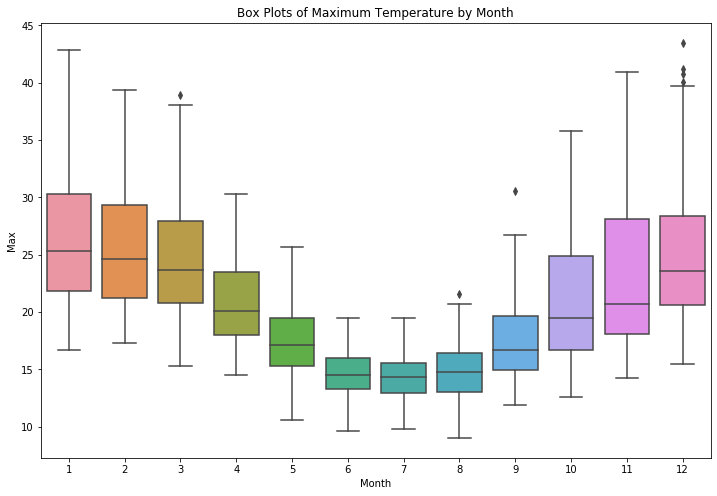

In [22]:
#Box plots of Month for Maximum temperature

plt.figure(figsize=(12,8))
sns.boxplot(x= 'Month', y= 'Max',data = MinMax)
plt.title('Box Plots of Maximum Temperature by Month')
plt.show()

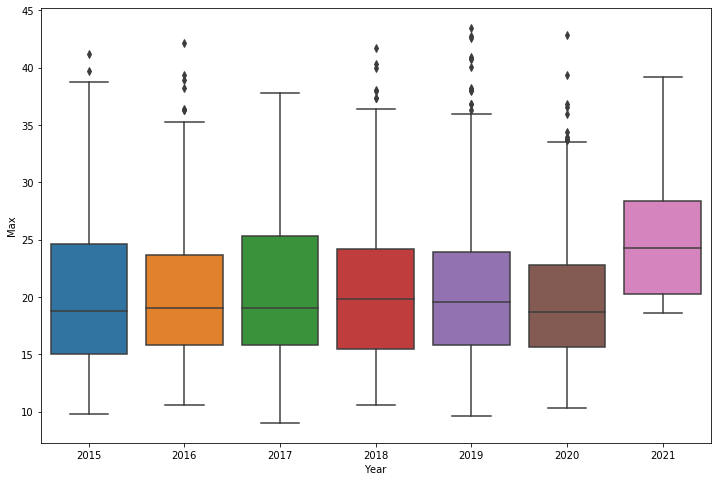

In [23]:
#Box plots of Year for Max temperature

plt.figure(figsize=(12,8))
sns.boxplot(x= 'Year', y= 'Max',data = MinMax)

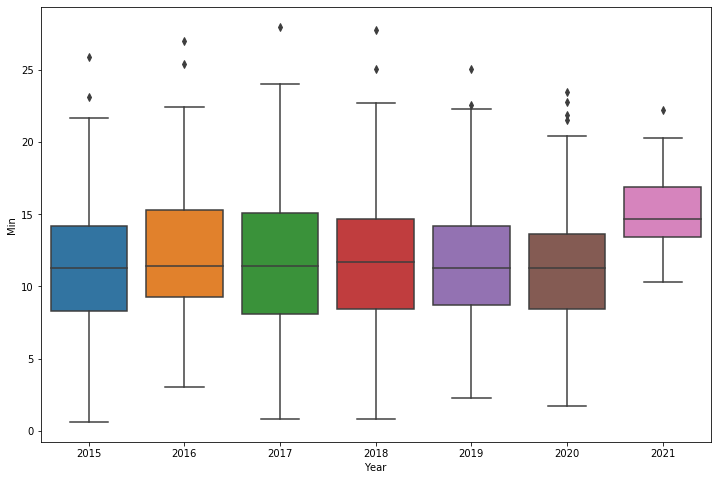

In [24]:
#Box plots of Year for Minumum temperature

plt.figure(figsize=(12,8))
sns.boxplot(x = 'Year', y = 'Min', data = MinMax)
plt.show()

#### Day of the Week, Day of the Month do not show any identifiable differences consider removing before predicting.  Month does have a clear trend. Year has more variation in the extreames. 

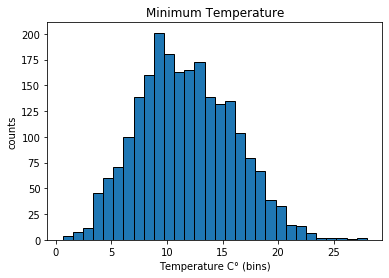

<Figure size 432x288 with 0 Axes>

In [25]:
#Histogram of Minimum Temperature

plt.hist(MinMax['Min'], edgecolor = 'black', bins=30)
plt.title('Minimum Temperature')
plt.xlabel('Temperature C° (bins)')
plt.ylabel('counts')
plt.show()
plt.clf()




In [26]:
#Summary Statistics

print(MinMax['Min'].describe())
print('skew:', MinMax['Min'].skew())

count    2251.000000
mean       11.720569
std         4.277323
min         0.600000
25%         8.700000
50%        11.500000
75%        14.700000
max        28.000000
Name: Min, dtype: float64
skew: 0.2624203702914613


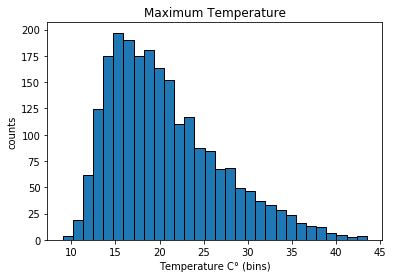

<Figure size 432x288 with 0 Axes>

In [27]:
#Histogram of Maximum Temperature

plt.hist(MinMax['Max'], edgecolor = 'black', bins=30)
plt.title('Maximum Temperature')
plt.xlabel('Temperature C° (bins)')
plt.ylabel('counts')
plt.show()
plt.clf()

In [28]:
#Summary Statistics

print(MinMax['Max'].describe())
print('skew:', MinMax['Max'].skew())

count    2251.000000
mean       20.598090
std         6.277976
min         9.000000
25%        15.800000
50%        19.300000
75%        24.300000
max        43.500000
Name: Max, dtype: float64
skew: 0.8772394383210472


### From the two histograms we can see that the Minimum temperatures have a bell shape but Max temperature is positively skewed

#### Maximum temperature needs further investigation.  So sepearte by year and see what is going on.

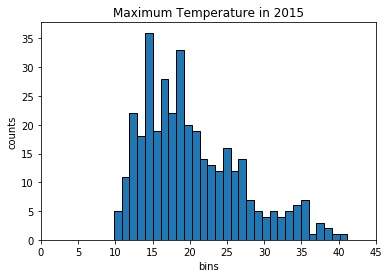

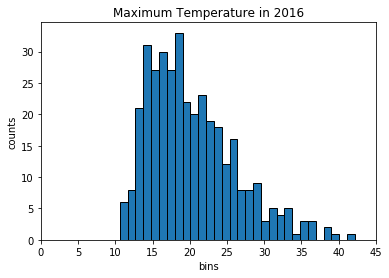

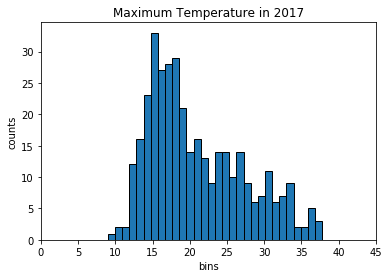

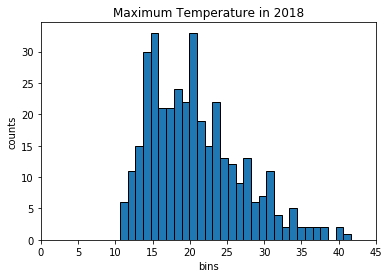

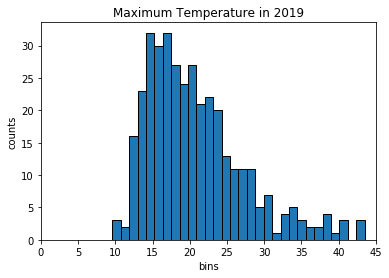

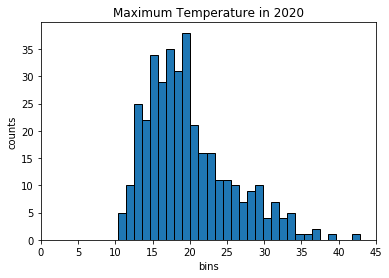

In [29]:
#Histogram by Year (Max 2015)

plt.hist(MinMax['Max'].iloc[0:365], edgecolor = 'black', bins=30)
plt.title('Maximum Temperature in 2015')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()
plt.clf()

#Max 2016

plt.hist(MinMax['Max'].iloc[365:731], edgecolor = 'black', bins=30)
plt.title('Maximum Temperature in 2016')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()
plt.clf()

#Max2017

plt.hist(MinMax['Max'].iloc[731:1096], edgecolor = 'black', bins=30)
plt.title('Maximum Temperature in 2017')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()

#Max 2018

plt.hist(MinMax['Max'].iloc[1096:1461], edgecolor = 'black', bins=30)
plt.title('Maximum Temperature in 2018')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()
plt.clf()

#Max 2019

plt.hist(MinMax['Max'].iloc[1461:1826], edgecolor = 'black', bins=30)
plt.title('Maximum Temperature in 2019')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()


#Max 2020
plt.hist(MinMax['Max'].iloc[1826:2192], edgecolor = 'black', bins=30)
plt.title('Maximum Temperature in 2020')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()

#### When aggregated the max temperature follows quite a smooth positively skewed graph.  Yearly it is difficult to see trends.  At first it may seem that if a year has extreame values then it will have a shallower mode and vice versa.  This may give some insight into predicting this years weather data as there may be some extreame temperatures this year.  Further investigation needed.  Histogram summary statistics needed.

In [30]:
#2015


print(MinMax['Max'].iloc[0:365].describe())

print('skew:', MinMax['Max'].iloc[0:365].skew())

count    365.000000
mean      20.359178
std        6.649688
min        9.800000
25%       15.000000
50%       18.800000
75%       24.600000
max       41.200000
Name: Max, dtype: float64
skew: 0.8438026497073926


In [31]:
#2016

print(MinMax['Max'].iloc[365:731].describe())
print('skew:', MinMax['Max'].iloc[365:731].skew())

count    366.000000
mean      20.325410
std        5.895425
min       10.600000
25%       15.800000
50%       19.050000
75%       23.675000
max       42.200000
Name: Max, dtype: float64
skew: 0.9428768963686318


In [32]:
#2017

print(MinMax['Max'].iloc[731:1096].describe())
print('skew:', MinMax['Max'].iloc[365:731].skew())

count    365.000000
mean      20.875616
std        6.434931
min        9.000000
25%       15.800000
50%       19.000000
75%       25.300000
max       37.800000
Name: Max, dtype: float64
skew: 0.9428768963686318


In [33]:
#2018

print(MinMax['Max'].iloc[1096:1461].describe())
print('skew:', MinMax['Max'].iloc[1096:1461].skew())

count    365.000000
mean      20.722192
std        6.164260
min       10.600000
25%       15.500000
50%       19.800000
75%       24.200000
max       41.700000
Name: Max, dtype: float64
skew: 0.8225639805853807


In [34]:
#2019

print(MinMax['Max'].iloc[1461:1826].describe())
print('skew:', MinMax['Max'].iloc[1461:1826].skew())

count    365.000000
mean      20.756164
std        6.558104
min        9.600000
25%       15.800000
50%       19.600000
75%       23.900000
max       43.500000
Name: Max, dtype: float64
skew: 1.1043210523172733


In [35]:
#2020

print(MinMax['Max'].iloc[1826:2192].describe())
print('skew:', MinMax['Max'].iloc[1826:2192].skew())

count    366.000000
mean      19.856557
std        5.810614
min       10.300000
25%       15.625000
50%       18.650000
75%       22.800000
max       42.900000
Name: Max, dtype: float64
skew: 0.9758570474392516


#### Depending on the max values of 2021 it may be possible to detect the overal shape of 2021's histogram.  Is it more like 2019 with a lot of skew or perhaps like 2018.  Let's test to find out.

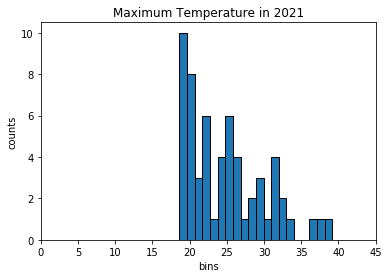

count    59.000000
mean     24.905085
std       5.298745
min      18.600000
25%      20.250000
50%      24.300000
75%      28.350000
max      39.200000
Name: Max, dtype: float64
skew: 0.9758570474392516


In [36]:
#Max 2021
plt.hist(MinMax['Max'].iloc[2192:], edgecolor = 'black', bins=20)
plt.title('Maximum Temperature in 2021')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()

#Max 2020
print(MinMax['Max'].iloc[2192:].describe())
print('skew:', MinMax['Max'].iloc[1826:2192:].skew())

#### Still not enough information.  Look at histograms of the first 96 days of each year and see which one most closely resembles the first 96 days of 2021.  Then get a similarity score and see if the machine learning algorithm can beat the accuracy of the year chosen. If not then use the year chosen as the prediction.

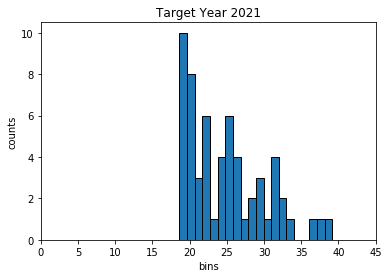

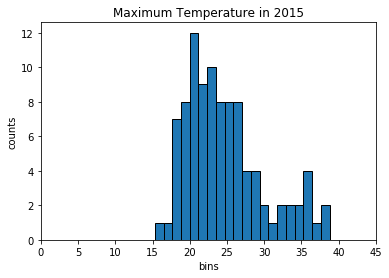

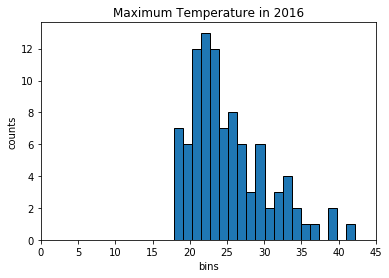

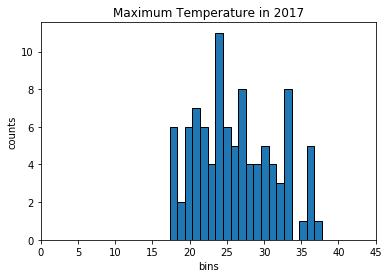

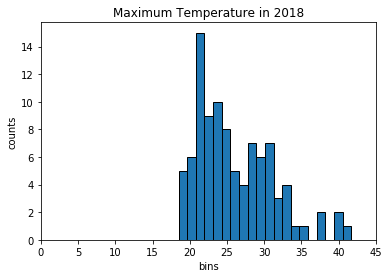

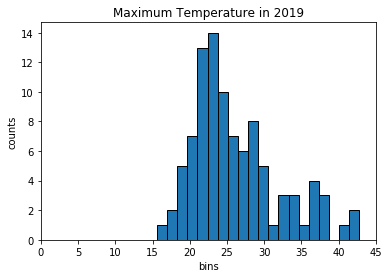

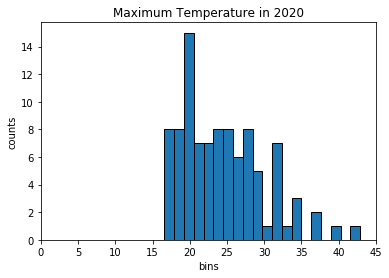

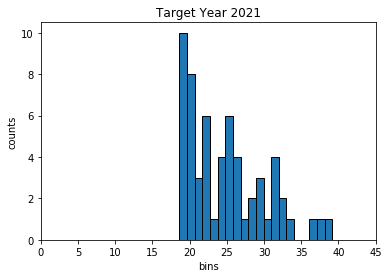

In [37]:
#First 96 days of each year.

#Target Year 2021

plt.hist(MinMax['Max'].iloc[2192:], edgecolor = 'black', bins=20)
plt.title('Target Year 2021')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()

#Max 2015

plt.hist(MinMax['Max'].iloc[0:96], edgecolor = 'black', bins=20)
plt.title('Maximum Temperature in 2015')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()
plt.clf()

#Max 2016

plt.hist(MinMax['Max'].iloc[365:461], edgecolor = 'black', bins=20)
plt.title('Maximum Temperature in 2016')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()
plt.clf()

#Max2017

plt.hist(MinMax['Max'].iloc[731:827], edgecolor = 'black', bins=20)
plt.title('Maximum Temperature in 2017')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()

#Max 2018

plt.hist(MinMax['Max'].iloc[1096:1192], edgecolor = 'black', bins=20)
plt.title('Maximum Temperature in 2018')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()
plt.clf()

#Max 2019

plt.hist(MinMax['Max'].iloc[1461:1557], edgecolor = 'black', bins=20)
plt.title('Maximum Temperature in 2019')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()


#Max 2020
plt.hist(MinMax['Max'].iloc[1826:1922], edgecolor = 'black', bins=20)
plt.title('Maximum Temperature in 2020')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()


#Target Year 2021

plt.hist(MinMax['Max'].iloc[2192:], edgecolor = 'black', bins=20)
plt.title('Target Year 2021')
plt.xlabel('bins')
plt.ylabel('counts')
plt.xlim([0,45])
plt.show()

#### Looks similar to 2016 or 2018.  Let's find the simliarity score of each year's first 96 days and then compare with 2021. And this can be our benchmark for the ML algorithms.

In [38]:
#KS 2 sample test for Max values

#2015

print('x=2015, y=2021', stats.ks_2samp(MinMax['Max'].iloc[0:96], MinMax['Max'].iloc[2192:]))

#2016
print('x=2016, y=2021', stats.ks_2samp(MinMax['Max'].iloc[365:461], MinMax['Max'].iloc[2192:]))

#2017
print('x=2017, y=2021', stats.ks_2samp(MinMax['Max'].iloc[731:827], MinMax['Max'].iloc[2192:]))

#2018
print('x=2018, y=2021', stats.ks_2samp(MinMax['Max'].iloc[1096:1192], MinMax['Max'].iloc[2192:]))

#2019
print('x=2019, y=2021', stats.ks_2samp(MinMax['Max'].iloc[1461:1557], MinMax['Max'].iloc[2192:]))

#2020
print('x=2030, y=2021', stats.ks_2samp(MinMax['Max'].iloc[1826:1922], MinMax['Max'].iloc[2192:]))

x=2015, y=2021 Ks_2sampResult(statistic=0.08333333333333333, pvalue=0.9363479538232516)
x=2016, y=2021 Ks_2sampResult(statistic=0.1553672316384181, pvalue=0.30183554124288636)
x=2017, y=2021 Ks_2sampResult(statistic=0.16596045197740114, pvalue=0.23354176369449642)
x=2018, y=2021 Ks_2sampResult(statistic=0.2074505649717514, pvalue=0.07243111153184789)
x=2019, y=2021 Ks_2sampResult(statistic=0.1671963276836158, pvalue=0.22657121007188163)
x=2030, y=2021 Ks_2sampResult(statistic=0.125, pvalue=0.5617658530533632)


#### It seems as if 2018 has the highest KS statistic with 0.236.  An ordered KS test might give further insight into the data and also eliminate day to day variation

In [39]:
stats.ks_2samp(MinMax['Max'][0:96].sort_values(), MinMax['Max'][2192:].sort_values())

Ks_2sampResult(statistic=0.08333333333333333, pvalue=0.9363479538232516)

In [40]:
stats.ks_2samp(MinMax['Max'][365:461].sort_values(), MinMax['Max'][2192:].sort_values())

Ks_2sampResult(statistic=0.1553672316384181, pvalue=0.30183554124288636)

#### KS test doesn't order???  Methodology may be wrong (ie. wrong test).  Help needed.  Spearman Corrrelation?

In [41]:
#2015

print('x=2015, y=2021', stats.spearmanr(a = MinMax['Max'].iloc[0:97],b =  MinMax['Max'].iloc[2192:]))

#2016
print('x=2016, y=2021', stats.spearmanr(MinMax['Max'].iloc[365:462], MinMax['Max'].iloc[2192:]))

#2017
print('x=2017, y=2021', stats.spearmanr(MinMax['Max'].iloc[731:828], MinMax['Max'].iloc[2192:]))

#2018
print('x=2018, y=2021', stats.spearmanr(MinMax['Max'].iloc[1096:1193], MinMax['Max'].iloc[2192:]))

#2019
print('x=2019, y=2021', stats.spearmanr(MinMax['Max'].iloc[1461:1558], MinMax['Max'].iloc[2192:]))

#2020
print('x=2030, y=2021', stats.spearmanr(MinMax['Max'].iloc[1826:1923], MinMax['Max'].iloc[2192:]))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 97 and the array at index 1 has size 59

#### It seems as if 2017 has the most correlation but it is quite weak even when it is ordered. Move on and make some predictions

In [42]:
#Training data.  Replacing years with integer values to get better results

MinMaxdrop = MinMax.drop(columns = ['Min', 'Max', 'Day of the Week', 'Day'])
MinMaxdrop = MinMaxdrop.replace([2015, 2016, 2017, 2018, 2019, 2020, 2021], [0, 1, 2, 3, 4, 5, 6])
MinMaxdrop

,Year,Month,Day of the Year
0,0,1,1
1,0,1,2
2,0,1,3
3,0,1,4
4,0,1,5
...,...,...,...
2246,6,2,55
2247,6,2,56
2248,6,2,57
2249,6,2,58


In [43]:
MinMaxdrop[:2251]

,Year,Month,Day of the Year
0,0,1,1
1,0,1,2
2,0,1,3
3,0,1,4
4,0,1,5
...,...,...,...
2246,6,2,55
2247,6,2,56
2248,6,2,57
2249,6,2,58


In [44]:
Max = MinMax.drop(columns = ['Year', 'Month', 'Day', 'Day of the Year', 'Day of the Week', 'Min'])
Max

,Max
0,26.9
1,38.8
2,38.2
3,21.4
4,22.0
...,...
2246,20.2
2247,24.3
2248,19.7
2249,18.6


In [51]:
2251-28

2223

In [55]:
MinMaxdrop[:2251]

,Year,Month,Day of the Year
0,0,1,1
1,0,1,2
2,0,1,3
3,0,1,4
4,0,1,5
...,...,...,...
2246,6,2,55
2247,6,2,56
2248,6,2,57
2249,6,2,58


In [57]:
#SVM

train_x = MinMaxdrop[:2223]
train_y = Max[:2223]

test_x = MinMaxdrop[2223:]
test_y = Max[2223:2251]

SVRML = svm.SVR()

SVRML.fit(train_x, train_y)
SVRML
SVRML = SVRML.predict(test_x)
SVRML

/Users/jason/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([25.29365274, 25.25466407, 25.21452497, 25.17323784, 25.13080548,
       25.0872311 , 25.04251831, 24.99667112, 24.94969397, 24.9015917 ,
       24.85236955, 24.80203319, 24.75058868, 24.69804251, 24.64440157,
       24.58967317, 24.53386502, 24.47698525, 24.4190424 , 24.3600454 ,
       24.30000363, 24.23892683, 24.17682517, 24.11370923, 24.04958996,
       23.98447874, 23.91838734, 23.85132792])

In [54]:
test_y

,Max
2223,20.3
2224,19.3
2225,25.9
2226,30.6
2227,29.8
2228,25.4
2229,19.2
2230,19.2
2231,25.2
2232,31.5


In [58]:
#K - Nearest Neighbours

KNN = svm.SVR()

KNN.fit(train_x, train_y)
KNN
KNN1 = KNN.predict(test_x)
KNN1

/Users/jason/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([25.29365274, 25.25466407, 25.21452497, 25.17323784, 25.13080548,
       25.0872311 , 25.04251831, 24.99667112, 24.94969397, 24.9015917 ,
       24.85236955, 24.80203319, 24.75058868, 24.69804251, 24.64440157,
       24.58967317, 24.53386502, 24.47698525, 24.4190424 , 24.3600454 ,
       24.30000363, 24.23892683, 24.17682517, 24.11370923, 24.04958996,
       23.98447874, 23.91838734, 23.85132792])

In [59]:
#GPR doesn't work

from sklearn.gaussian_process import GaussianProcessRegressor as GPR

GPR().fit(train_x, train_y)
GPR1 =  GPR().predict(test_x)
GPR1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [60]:
#Decision tree has more variation albeit quite wide and is slightly more realistic.

from sklearn import tree

DT = tree.DecisionTreeRegressor(random_state = 0)

DTFIT = DT.fit(train_x, train_y)
DT1 = DTFIT.predict(test_x)
DT1

array([21.8, 21.8, 21.8, 21.8, 21.8, 21.8, 21.8, 21.8, 21.8, 21.8, 21.8,
       21.8, 21.8, 21.8, 21.8, 26.4, 25.6, 21.8, 19.7, 18.7, 19.6, 21.1,
       34. , 23.7, 31.6, 19.2, 19.7, 20.1])

In [61]:
#MLP has quite a wide range but it still just slowly goes down in values

from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(random_state = 0).fit(train_x, train_y)
MLP1 = MLP.predict(test_x)
MLP1

/Users/jason/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jason/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([29.09985309, 29.07023274, 29.04061238, 29.01099203, 28.9752853 ,
       28.90995644, 28.8201445 , 28.60489016, 28.38963582, 28.17438148,
       27.95912714, 27.7438728 , 27.52861846, 27.31336412, 27.09810978,
       26.88285544, 26.6676011 , 26.45234676, 26.23709242, 26.02183808,
       25.80658374, 25.5913294 , 25.37607507, 25.16082073, 24.94556639,
       24.73031205, 24.51505771, 24.29980337])

In [62]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor as RF

RF1 = RF(random_state = 2).fit(train_x, train_y).predict(test_x)
RF1

/Users/jason/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


array([23.895, 23.118, 21.169, 20.664, 21.51 , 24.04 , 23.613, 24.945,
       25.305, 25.401, 25.066, 25.559, 27.813, 28.762, 22.525, 23.947,
       24.982, 22.187, 20.514, 19.992, 20.288, 22.824, 28.345, 25.392,
       27.217, 21.829, 20.424, 21.261])

From the output it seems as if Random Forest Regression and Decision Tree are the most reliable.  But need to test spearman correlation.

In [63]:
#Spearman with ML programs


print('Random Forrest:     ', stats.spearmanr(a = RF1, b =  test_y))


print('Decision Tree:      ', stats.spearmanr(DT1, test_y))

print('MLP:                ', stats.spearmanr(MLP1, test_y))

print('Gaussian:           ', stats.spearmanr(GPR1, test_y))

print('K Nearest Neighbour ', stats.spearmanr(KNN1, test_y))


Random Forrest:      SpearmanrResult(correlation=-0.14238775410130486, pvalue=0.46980928569445424)
Decision Tree:       SpearmanrResult(correlation=0.07680272589301165, pvalue=0.697684757888114)
MLP:                 SpearmanrResult(correlation=0.13855423764473127, pvalue=0.4819706677515674)
Gaussian:            SpearmanrResult(correlation=nan, pvalue=nan)
K Nearest Neighbour  SpearmanrResult(correlation=0.13855423764473127, pvalue=0.4819706677515674)


/Users/jason/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/jason/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/jason/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/jason/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/jason/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Pearson doesn't seems to work.  The spearman correlation favours the ML algorithms that have an order to them (KNN and MLP) however this is unrealistic and therefore it will be better to choose the DT regressor.  KNN and MLP will overfit even though all have a very low correlation.

#### Now to predict from April till August (best use current data from March and just add to the data set)

In [65]:
AddedDates = pd.read_csv('Added Dates 2.csv')
AddedDates

,Year,Month,Day of the Year
0,2021,3,60
1,2021,3,61
2,2021,3,62
3,2021,3,63
4,2021,3,64
...,...,...,...
179,2021,8,239
180,2021,8,240
181,2021,8,241
182,2021,8,242


In [66]:
AddedDates = AddedDates.replace(2021, 6)
AddedDates

,Year,Month,Day of the Year
0,6,3,60
1,6,3,61
2,6,3,62
3,6,3,63
4,6,3,64
...,...,...,...
179,6,8,239
180,6,8,240
181,6,8,241
182,6,8,242


In [67]:
#AddedDates1 = pd.concat([MinMaxdrop, AddedDates])
#AddedDates1

In [68]:
AddedDates1 = AddedDates

In [69]:
import pickle
# save the model to disk
MaxPredict = 'MaxPredict.sav'
pickle.dump(DTFIT.predict(AddedDates), open(MaxPredict, 'wb'))

In [70]:
AddedDates1['MaxPrediction'] = DTFIT.predict(AddedDates)
AddedDates

,Year,Month,Day of the Year,MaxPrediction
0,6,3,60,22.4
1,6,3,61,32.1
2,6,3,62,18.4
3,6,3,63,19.5
4,6,3,64,23.5
...,...,...,...,...
179,6,8,239,14.5
180,6,8,240,20.7
181,6,8,241,17.6
182,6,8,242,19.3


In [71]:
AddedDates.to_csv('MaxPredictionOnly.csv')

In [72]:
AddedDates[70:110]

,Year,Month,Day of the Year,MaxPrediction
70,6,5,130,14.0
71,6,5,131,14.5
72,6,5,132,17.1
73,6,5,133,14.8
74,6,5,134,14.5
75,6,5,135,14.7
76,6,5,136,15.3
77,6,5,137,18.0
78,6,5,138,18.5
79,6,5,139,19.4


#### With this prediction we can do the same process for the Min prediction and then add it to our table

In [73]:
Min = MinMax.drop(columns = ['Year', 'Month', 'Day', 'Day of the Year', 'Day of the Week', 'Max'])
Min

,Min
0,13.3
1,15.4
2,20.0
3,16.3
4,15.0
...,...
2246,13.0
2247,11.3
2248,13.3
2249,11.3


In [101]:
#SVM

train_x = MinMaxdrop[:2223]
train_y = Min[:2223]

test_x = MinMaxdrop[2223:]
test_y = Min[2223:2251]

SVRML = svm.SVR()

SVRML.fit(train_x, train_y)
SVRML
SVM2 = SVRML.predict(test_x)
SVM2

/Users/jason/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([16.12396212, 16.09287384, 16.06093031, 16.02813414, 15.99448828,
       15.95999592, 15.92466058, 15.88848606, 15.85147644, 15.81363611,
       15.77496973, 15.73548228, 15.69517899, 15.65406543, 15.61214741,
       15.56943107, 15.52592282, 15.48162935, 15.43655764, 15.39071497,
       15.34410888, 15.29674721, 15.24863806, 15.19978984, 15.1502112 ,
       15.09991109, 15.04889871, 14.99718355])

In [102]:
test_y

,Min
2223,13.4
2224,14.5
2225,13.7
2226,13.5
2227,17.3
2228,16.9
2229,14.7
2230,15.0
2231,12.0
2232,13.8


In [103]:
#K - Nearest Neighbours

KNN = svm.SVR()

KNN.fit(train_x, train_y)
KNN
KNN2 = KNN.predict(test_x)
KNN2

/Users/jason/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([16.12396212, 16.09287384, 16.06093031, 16.02813414, 15.99448828,
       15.95999592, 15.92466058, 15.88848606, 15.85147644, 15.81363611,
       15.77496973, 15.73548228, 15.69517899, 15.65406543, 15.61214741,
       15.56943107, 15.52592282, 15.48162935, 15.43655764, 15.39071497,
       15.34410888, 15.29674721, 15.24863806, 15.19978984, 15.1502112 ,
       15.09991109, 15.04889871, 14.99718355])

In [104]:
#GPR doesn't work

GPR().fit(train_x, train_y)
GPR2 =  GPR().predict(test_x)
GPR2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [105]:
#Decision tree has more variation albeit quite wide and is slightly more realistic.

from sklearn import tree

DT = tree.DecisionTreeRegressor(random_state = 0)

DTFIT2 = DT.fit(train_x, train_y)
DT2 = DT.predict(test_x)
DT2

array([16.4, 14.2, 13.2, 11.3, 10.8, 13.7, 16.5, 17.4, 19.6, 18.5, 19.5,
       19.1, 19.4, 20.3, 18.9, 16.9, 15.2, 17.6, 13.3, 14.2, 13.5, 11.4,
       13.3, 16.8, 18.4, 16.2, 11. , 13.1])

In [106]:
#MLP has quite a wide range but it still just slowly goes down in values

from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(random_state = 0).fit(train_x, train_y)
MLP2 = MLP.predict(test_x)
MLP2

/Users/jason/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([18.24676457, 18.24843412, 18.25010366, 18.23554053, 18.18212489,
       18.09857667, 18.01502846, 17.93148024, 17.84793202, 17.7643838 ,
       17.68083558, 17.59728736, 17.51373914, 17.43019093, 17.34664271,
       17.26309449, 17.17954627, 17.09599805, 17.01244983, 16.90258068,
       16.74064775, 16.57871483, 16.41678191, 16.25484898, 16.09291606,
       15.93098313, 15.76905021, 15.60711729])

In [107]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor as RF

RF2 = RF(random_state = 2).fit(train_x, train_y).predict(test_x)
RF2

/Users/jason/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


array([18.906, 15.609, 14.13 , 12.605, 12.11 , 13.762, 16.102, 16.999,
       18.542, 18.527, 18.908, 18.93 , 19.011, 19.592, 18.643, 17.425,
       16.005, 16.514, 14.495, 14.064, 13.571, 12.307, 13.235, 15.869,
       17.584, 15.975, 12.83 , 13.339])

In [108]:
#Spearman with ML programs


print('Random Forrest:     ', stats.spearmanr(a = RF2, b =  test_y))


print('Decision Tree:      ', stats.spearmanr(DT2, test_y))

print('MLP:                ', stats.spearmanr(MLP2, test_y))

print('Gaussian:           ', stats.spearmanr(GPR2, test_y))

print('K Nearest Neighbour ', stats.spearmanr(KNN2, test_y))

print('SVM                 ', stats.spearmanr(SVM2, test_y))

Random Forrest:      SpearmanrResult(correlation=-0.055304590563797086, pvalue=0.7798489128046053)
Decision Tree:       SpearmanrResult(correlation=-0.043269889492328316, pvalue=0.8269414470438841)
MLP:                 SpearmanrResult(correlation=0.19876798390750833, pvalue=0.310586651595035)
Gaussian:            SpearmanrResult(correlation=nan, pvalue=nan)
K Nearest Neighbour  SpearmanrResult(correlation=0.19657770309310052, pvalue=0.3160571608603195)
SVM                  SpearmanrResult(correlation=0.19657770309310052, pvalue=0.3160571608603195)


/Users/jason/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/jason/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/jason/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/jason/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/jason/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


#### Incredibly low result and as expected the ML programs that go in desending order are best fit with spearman correlation.  Will choose decision DT instead.

In [109]:
AddedDates1 = AddedDates1.drop(columns = "MaxPrediction")
AddedDates

KeyError: "['MaxPrediction'] not found in axis"

In [ ]:
AddedDates1


In [110]:
import pickle
# save the model to disk
MinPredict = 'MinPredict.sav'
pickle.dump(DTFIT2.predict(AddedDates1), open(MinPredict, 'wb'))

In [111]:
AddedDates3 = AddedDates
AddedDates3['MinPrediction'] = DTFIT2.predict(AddedDates1)
AddedDates3

,Year,Month,Day of the Year,MaxPrediction,MinPrediction,Bool
0,6,3,60,22.4,14.7,False
1,6,3,61,32.1,13.2,False
2,6,3,62,18.4,14.2,False
3,6,3,63,19.5,14.7,False
4,6,3,64,23.5,13.6,False
...,...,...,...,...,...,...
179,6,8,239,14.5,6.1,False
180,6,8,240,20.7,8.8,False
181,6,8,241,17.6,8.5,False
182,6,8,242,19.3,9.2,False


In [112]:
AddedDates['Bool'] = AddedDates['MaxPrediction'] > AddedDates['MinPrediction']
AddedDates

,Year,Month,Day of the Year,MaxPrediction,MinPrediction,Bool
0,6,3,60,22.4,14.7,True
1,6,3,61,32.1,13.2,True
2,6,3,62,18.4,14.2,True
3,6,3,63,19.5,14.7,True
4,6,3,64,23.5,13.6,True
...,...,...,...,...,...,...
179,6,8,239,14.5,6.1,True
180,6,8,240,20.7,8.8,True
181,6,8,241,17.6,8.5,True
182,6,8,242,19.3,9.2,True


In [113]:
np.sum(AddedDates['Bool'])

184

In [114]:
AddedDates4 = AddedDates3.drop(columns = ["MaxPrediction", "Bool"])
AddedDates4

,Year,Month,Day of the Year,MinPrediction
0,6,3,60,14.7
1,6,3,61,13.2
2,6,3,62,14.2
3,6,3,63,14.7
4,6,3,64,13.6
...,...,...,...,...
179,6,8,239,6.1
180,6,8,240,8.8
181,6,8,241,8.5
182,6,8,242,9.2


In [115]:
AddedDates4.to_csv('MinPredictionOnly.csv')

#### Therefore all Minimum values are below maximum values which makes sense.  Now to add to the list and to export file.

In [116]:
predicted_values = pd.concat([MinMax, AddedDates])
predicted_values

,Year,Month,Day,Day of the Year,Day of the Week,Min,Max,MaxPrediction,MinPrediction,Bool
0,2015,1,1,1,Thursday,13.3,26.9,NaN,NaN,NaN
1,2015,1,2,2,Friday,15.4,38.8,NaN,NaN,NaN
2,2015,1,3,3,Saturday,20.0,38.2,NaN,NaN,NaN
3,2015,1,4,4,Sunday,16.3,21.4,NaN,NaN,NaN
4,2015,1,5,5,Monday,15.0,22.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
179,6,8,NaN,239,NaN,NaN,NaN,14.5,6.1,True
180,6,8,NaN,240,NaN,NaN,NaN,20.7,8.8,True
181,6,8,NaN,241,NaN,NaN,NaN,17.6,8.5,True
182,6,8,NaN,242,NaN,NaN,NaN,19.3,9.2,True


In [117]:
predicted_values.to_csv('PredictedValueswithNANMINMAX.csv')

In [118]:
AddedDates.to_csv('OnlyPredictionsMINMAX.csv')

In [119]:
#### Adding Predicted Values to Min and Max columns

In [181]:
FakeAddedDates = AddedDates
FakeAddedDates

,Year,Month,Day of the Year,MaxPrediction,MinPrediction,Bool
0,6,3,60,22.4,14.7,True
1,6,3,61,32.1,13.2,True
2,6,3,62,18.4,14.2,True
3,6,3,63,19.5,14.7,True
4,6,3,64,23.5,13.6,True
...,...,...,...,...,...,...
179,6,8,239,14.5,6.1,True
180,6,8,240,20.7,8.8,True
181,6,8,241,17.6,8.5,True
182,6,8,242,19.3,9.2,True


In [183]:
FakeAddedDates = FakeAddedDates.rename(columns = {'MaxPrediction' : 'Max', "MinPrediction" : 'Min'})

In [122]:
predicted_values1 = pd.concat([MinMax, FakeAddedDates])
predicted_values1

,Year,Month,Day,Day of the Year,Day of the Week,Min,Max,Bool
0,2015,1,1,1,Thursday,13.3,26.9,NaN
1,2015,1,2,2,Friday,15.4,38.8,NaN
2,2015,1,3,3,Saturday,20.0,38.2,NaN
3,2015,1,4,4,Sunday,16.3,21.4,NaN
4,2015,1,5,5,Monday,15.0,22.0,NaN
...,...,...,...,...,...,...,...,...
179,6,8,NaN,239,NaN,6.1,14.5,True
180,6,8,NaN,240,NaN,8.8,20.7,True
181,6,8,NaN,241,NaN,8.5,17.6,True
182,6,8,NaN,242,NaN,9.2,19.3,True


In [123]:
predicted_values1.to_csv('CurrentandPredictedValuesMINMAX.csv')

<function matplotlib.pyplot.show(*args, **kw)>

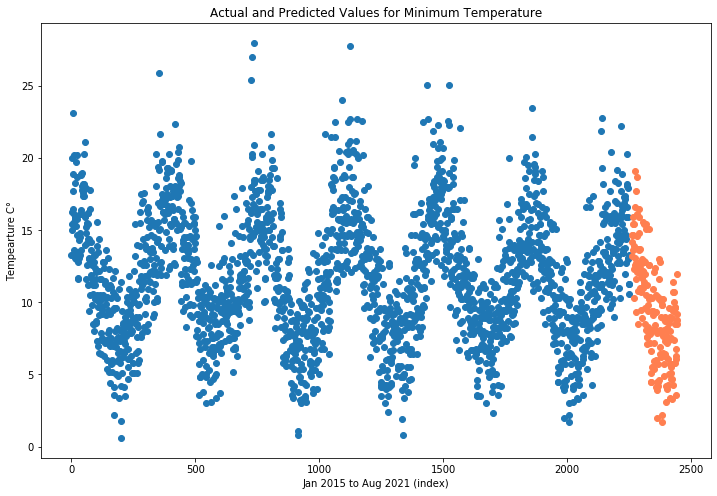

In [124]:
plt.figure(figsize=(12,8))

plt.scatter(MinMax.index, MinMax['Min'])

plt.scatter(predicted_values.index+2261, predicted_values['MinPrediction'], c='coral')

plt.title('Actual and Predicted Values for Minimum Temperature')
plt.xlabel('Jan 2015 to Aug 2021 (index)')
plt.ylabel('Tempearture C°')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

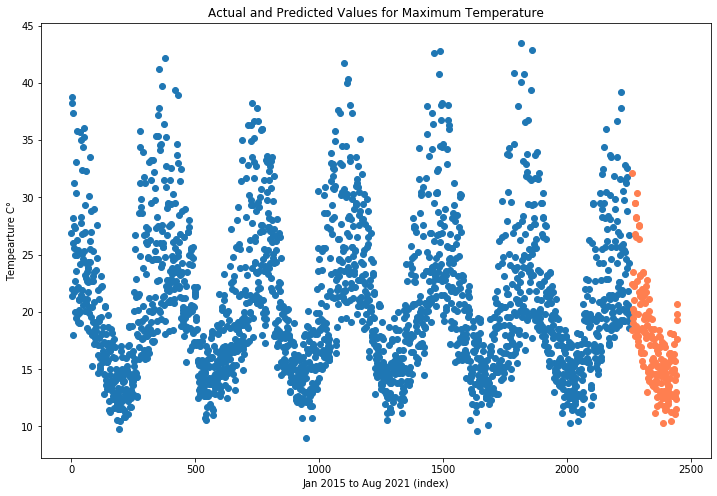

In [125]:
plt.figure(figsize=(12,8))

plt.scatter(MinMax.index, MinMax['Max'])

plt.scatter(predicted_values.index+2261, predicted_values['MaxPrediction'], c='coral')

plt.title('Actual and Predicted Values for Maximum Temperature')
plt.xlabel('Jan 2015 to Aug 2021 (index)')
plt.ylabel('Tempearture C°')
plt.show

In [126]:
MinMax

,Year,Month,Day,Day of the Year,Day of the Week,Min,Max
0,2015,1,1,1,Thursday,13.3,26.9
1,2015,1,2,2,Friday,15.4,38.8
2,2015,1,3,3,Saturday,20.0,38.2
3,2015,1,4,4,Sunday,16.3,21.4
4,2015,1,5,5,Monday,15.0,22.0
...,...,...,...,...,...,...,...
2246,2021,2,24,55,Wednesday,13.0,20.2
2247,2021,2,25,56,Thursday,11.3,24.3
2248,2021,2,26,57,Friday,13.3,19.7
2249,2021,2,27,58,Saturday,11.3,18.6


In [127]:
predicted_values

,Year,Month,Day,Day of the Year,Day of the Week,Min,Max,MaxPrediction,MinPrediction,Bool
0,2015,1,1,1,Thursday,13.3,26.9,NaN,NaN,NaN
1,2015,1,2,2,Friday,15.4,38.8,NaN,NaN,NaN
2,2015,1,3,3,Saturday,20.0,38.2,NaN,NaN,NaN
3,2015,1,4,4,Sunday,16.3,21.4,NaN,NaN,NaN
4,2015,1,5,5,Monday,15.0,22.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
179,6,8,NaN,239,NaN,NaN,NaN,14.5,6.1,True
180,6,8,NaN,240,NaN,NaN,NaN,20.7,8.8,True
181,6,8,NaN,241,NaN,NaN,NaN,17.6,8.5,True
182,6,8,NaN,242,NaN,NaN,NaN,19.3,9.2,True


In [128]:
predicted_values2 = predicted_values1.drop

In [129]:
MaxPredictionOnly = pd.read_csv('MaxPredictionOnly.csv')
MaxPredictionOnly.drop(columns = "Unnamed: 0", inplace = True)
MaxPredictionOnly = MaxPredictionOnly.rename(columns = {'MaxPrediction': 'Max'})
MaxPredictionOnly

,Year,Month,Day of the Year,Max
0,6,3,60,22.4
1,6,3,61,32.1
2,6,3,62,18.4
3,6,3,63,19.5
4,6,3,64,23.5
...,...,...,...,...
179,6,8,239,14.5
180,6,8,240,20.7
181,6,8,241,17.6
182,6,8,242,19.3


In [130]:
MinMaxdrop1 = MinMaxdrop
MinMaxdrop1['Max'] = Max
MinMaxdrop1 = pd.concat([MinMaxdrop1, MaxPredictionOnly])
MinMaxdrop1

,Year,Month,Day of the Year,Max
0,0,1,1,26.9
1,0,1,2,38.8
2,0,1,3,38.2
3,0,1,4,21.4
4,0,1,5,22.0
...,...,...,...,...
179,6,8,239,14.5
180,6,8,240,20.7
181,6,8,241,17.6
182,6,8,242,19.3


In [131]:
MinMaxdrop1.to_csv('MaxAllValues.csv')

In [132]:
MinMaxdrop

,Year,Month,Day of the Year,Max
0,0,1,1,26.9
1,0,1,2,38.8
2,0,1,3,38.2
3,0,1,4,21.4
4,0,1,5,22.0
...,...,...,...,...
2246,6,2,55,20.2
2247,6,2,56,24.3
2248,6,2,57,19.7
2249,6,2,58,18.6


In [133]:
AddedDates4 = AddedDates4.rename(columns = {'MinPrediction': 'Min'})
MinMaxdrop2 = MinMaxdrop.drop(columns = "Max")
MinMaxdrop2['Min'] = Min
MinMaxdrop2 = pd.concat([MinMaxdrop2, AddedDates4])
MinMaxdrop2

,Year,Month,Day of the Year,Min
0,0,1,1,13.3
1,0,1,2,15.4
2,0,1,3,20.0
3,0,1,4,16.3
4,0,1,5,15.0
...,...,...,...,...
179,6,8,239,6.1
180,6,8,240,8.8
181,6,8,241,8.5
182,6,8,242,9.2


In [134]:
MinMaxdrop2.to_csv('MinAllValues.csv')

In [135]:
############################################################################################################################################

#### Due to the nature of uploading it to the website some edits have to be made and therefore the below code is a repeat of the existing code above with the addition of dates and the predcition starting in March and not the 4th of April.

In [136]:
############################################################################################################################################

In [137]:
IndexDates = pd.read_csv('Dates.csv', header = None)
IndexDates

,0
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05
...,...
2430,2021-08-27
2431,2021-08-28
2432,2021-08-29
2433,2021-08-30


In [166]:
FakeAddedDates

,Year,Month,Day of the Year,Max,Min,Bool
0,6,3,60,22.4,14.7,True
1,6,3,61,32.1,13.2,True
2,6,3,62,18.4,14.2,True
3,6,3,63,19.5,14.7,True
4,6,3,64,23.5,13.6,True
...,...,...,...,...,...,...
179,6,8,239,14.5,6.1,True
180,6,8,240,20.7,8.8,True
181,6,8,241,17.6,8.5,True
182,6,8,242,19.3,9.2,True


In [154]:
MinMaxdrop['Min'] = MinMax['Min']
MinMaxdrop


,Year,Month,Day of the Year,Max,Min
0,0,1,1,26.9,13.3
1,0,1,2,38.8,15.4
2,0,1,3,38.2,20.0
3,0,1,4,21.4,16.3
4,0,1,5,22.0,15.0
...,...,...,...,...,...
2246,6,2,55,20.2,13.0
2247,6,2,56,24.3,11.3
2248,6,2,57,19.7,13.3
2249,6,2,58,18.6,11.3


In [155]:
CSVFOREXPORT = MinMaxdrop

In [177]:
CSVFOREXPORT['dates'] = IndexDates
CSVFOREXPORT.set_index('dates', inplace = True)
CSVFOREXPORT

,Year,Month,Day of the Year,Max,Min
dates,,,,,
2015-01-01,0,1,1,26.9,13.3
2015-01-02,0,1,2,38.8,15.4
2015-01-03,0,1,3,38.2,20.0
2015-01-04,0,1,4,21.4,16.3
2015-01-05,0,1,5,22.0,15.0
...,...,...,...,...,...
2021-02-24,6,2,55,20.2,13.0
2021-02-25,6,2,56,24.3,11.3
2021-02-26,6,2,57,19.7,13.3


In [172]:
a = np.asmatrix(IndexDates[2251:])
a

matrix([['2021-03-01'],
        ['2021-03-02'],
        ['2021-03-03'],
        ['2021-03-04'],
        ['2021-03-05'],
        ['2021-03-06'],
        ['2021-03-07'],
        ['2021-03-08'],
        ['2021-03-09'],
        ['2021-03-10'],
        ['2021-03-11'],
        ['2021-03-12'],
        ['2021-03-13'],
        ['2021-03-14'],
        ['2021-03-15'],
        ['2021-03-16'],
        ['2021-03-17'],
        ['2021-03-18'],
        ['2021-03-19'],
        ['2021-03-20'],
        ['2021-03-21'],
        ['2021-03-22'],
        ['2021-03-23'],
        ['2021-03-24'],
        ['2021-03-25'],
        ['2021-03-26'],
        ['2021-03-27'],
        ['2021-03-28'],
        ['2021-03-29'],
        ['2021-03-30'],
        ['2021-03-31'],
        ['2021-04-01'],
        ['2021-04-02'],
        ['2021-04-03'],
        ['2021-04-04'],
        ['2021-04-05'],
        ['2021-04-06'],
        ['2021-04-07'],
        ['2021-04-08'],
        ['2021-04-09'],
        ['2021-04-10'],
        ['2021-0

In [185]:
FakeAddedDates['dates'] = a
FakeAddedDates.set_index('dates', inplace = True)
FakeAddedDates

,Year,Month,Day of the Year,Max,Min,Bool
dates,,,,,,
2021-03-01,6,3,60,22.4,14.7,True
2021-03-02,6,3,61,32.1,13.2,True
2021-03-03,6,3,62,18.4,14.2,True
2021-03-04,6,3,63,19.5,14.7,True
2021-03-05,6,3,64,23.5,13.6,True
...,...,...,...,...,...,...
2021-08-27,6,8,239,14.5,6.1,True
2021-08-28,6,8,240,20.7,8.8,True
2021-08-29,6,8,241,17.6,8.5,True


In [186]:
FakeAddedDates.drop(columns = 'Bool', inplace = True)
FakeAddedDates

,Year,Month,Day of the Year,Max,Min
dates,,,,,
2021-03-01,6,3,60,22.4,14.7
2021-03-02,6,3,61,32.1,13.2
2021-03-03,6,3,62,18.4,14.2
2021-03-04,6,3,63,19.5,14.7
2021-03-05,6,3,64,23.5,13.6
...,...,...,...,...,...
2021-08-27,6,8,239,14.5,6.1
2021-08-28,6,8,240,20.7,8.8
2021-08-29,6,8,241,17.6,8.5


In [187]:
FakeAddedDates['Class'] = "Predict"

In [188]:
FakeAddedDates

,Year,Month,Day of the Year,Max,Min,Class
dates,,,,,,
2021-03-01,6,3,60,22.4,14.7,Predict
2021-03-02,6,3,61,32.1,13.2,Predict
2021-03-03,6,3,62,18.4,14.2,Predict
2021-03-04,6,3,63,19.5,14.7,Predict
2021-03-05,6,3,64,23.5,13.6,Predict
...,...,...,...,...,...,...
2021-08-27,6,8,239,14.5,6.1,Predict
2021-08-28,6,8,240,20.7,8.8,Predict
2021-08-29,6,8,241,17.6,8.5,Predict


In [189]:
CSVFOREXPORT['Class'] = "Actual"
CSVFOREXPORT

,Year,Month,Day of the Year,Max,Min,Class
dates,,,,,,
2015-01-01,0,1,1,26.9,13.3,Actual
2015-01-02,0,1,2,38.8,15.4,Actual
2015-01-03,0,1,3,38.2,20.0,Actual
2015-01-04,0,1,4,21.4,16.3,Actual
2015-01-05,0,1,5,22.0,15.0,Actual
...,...,...,...,...,...,...
2021-02-24,6,2,55,20.2,13.0,Actual
2021-02-25,6,2,56,24.3,11.3,Actual
2021-02-26,6,2,57,19.7,13.3,Actual


In [191]:
csvforexport = pd.concat([CSVFOREXPORT, FakeAddedDates])
csvforexport

,Year,Month,Day of the Year,Max,Min,Class
dates,,,,,,
2015-01-01,0,1,1,26.9,13.3,Actual
2015-01-02,0,1,2,38.8,15.4,Actual
2015-01-03,0,1,3,38.2,20.0,Actual
2015-01-04,0,1,4,21.4,16.3,Actual
2015-01-05,0,1,5,22.0,15.0,Actual
...,...,...,...,...,...,...
2021-08-27,6,8,239,14.5,6.1,Predict
2021-08-28,6,8,240,20.7,8.8,Predict
2021-08-29,6,8,241,17.6,8.5,Predict


In [192]:
csvforexport.to_csv('MinMaxPredictNew.csv')